## 과제: 피마 인디언 당뇨병 예측

## 강혜쑤 

In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 데이터 확인하기

In [319]:
diabetes_data.info()
diabetes_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [320]:
print(diabetes_data["Outcome"].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


### 데이터 전처리

In [321]:
# 실제로 0이 나올 수 없는 데이터 값들
nozero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in nozero_features:
    zero_count = diabetes_data[diabetes_data[feature] ==0][feature].count()
    print('{0} 중 수치가 0인 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/768)) #전체 건수 : 768
    
#평균값 대체
diabetes_data[nozero_features]=diabetes_data[nozero_features].replace(0, diabetes_data[nozero_features].mean())

Glucose 중 수치가 0인 건수는 5, 퍼센트는 0.65 %
BloodPressure 중 수치가 0인 건수는 35, 퍼센트는 4.56 %
SkinThickness 중 수치가 0인 건수는 227, 퍼센트는 29.56 %
Insulin 중 수치가 0인 건수는 374, 퍼센트는 48.70 %
BMI 중 수치가 0인 건수는 11, 퍼센트는 1.43 %
Age 중 수치가 0인 건수는 0, 퍼센트는 0.00 %


In [322]:
p="Pregnancies"
diabetes_data.loc[diabetes_data[p]<4,p]=0
diabetes_data.loc[(diabetes_data[p]>=4)&(diabetes_data[p]<7),p]=1
diabetes_data.loc[(diabetes_data[p]>=7)&(diabetes_data[p]<10),p]=2
diabetes_data.loc[(diabetes_data[p]>=10)&(diabetes_data[p]<13),p]=3
diabetes_data.loc[(diabetes_data[p]>=13),p]=4

<AxesSubplot:xlabel='Outcome', ylabel='count'>

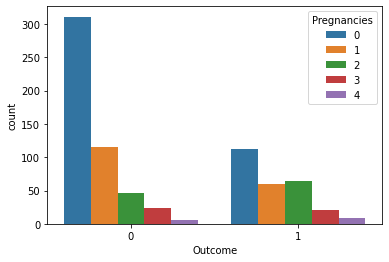

In [323]:
sns.countplot(data=diabetes_data, x='Outcome', hue="Pregnancies")

In [324]:
g="Glucose"
diabetes_data.loc[diabetes_data[g]<70,g]=0
diabetes_data.loc[(diabetes_data[g]>=70)&(diabetes_data[g]<110),g]=1
diabetes_data.loc[(diabetes_data[g]>=110)&(diabetes_data[g]<150),g]=2
diabetes_data.loc[(diabetes_data[g]>=150),g]=3

<AxesSubplot:xlabel='Outcome', ylabel='count'>

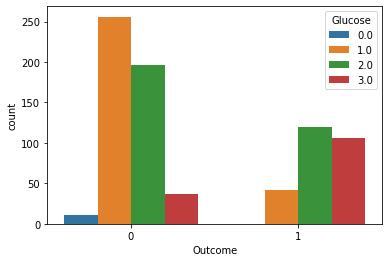

In [325]:
sns.countplot(data=diabetes_data, x='Outcome', hue='Glucose')

In [326]:
b="BloodPressure"
diabetes_data.loc[diabetes_data[b]<50,b]=0
diabetes_data.loc[(diabetes_data[b]>=50)&(diabetes_data[b]<65),b]=1
diabetes_data.loc[(diabetes_data[b]>=65)&(diabetes_data[b]<80),b]=2
diabetes_data.loc[(diabetes_data[b]>=80)&(diabetes_data[b]<95),b]=3
diabetes_data.loc[(diabetes_data[b]>=95)&(diabetes_data[b]<110),b]=4
diabetes_data.loc[(diabetes_data[b]>=110),b]=5

<AxesSubplot:xlabel='Outcome', ylabel='count'>

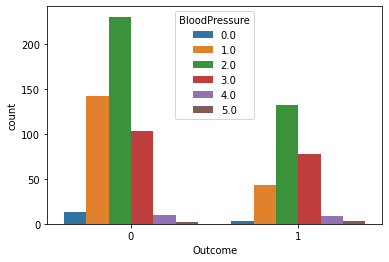

In [327]:
sns.countplot(data=diabetes_data, x='Outcome', hue=b)

In [328]:
f="DiabetesPedigreeFunction"
diabetes_data.loc[diabetes_data[f]<0.5,f]=0
diabetes_data.loc[(diabetes_data[f]>=0.5)&(diabetes_data[f]<0.8),f]=1
diabetes_data.loc[(diabetes_data[f]>=0.8)&(diabetes_data[f]<1.1),f]=2
diabetes_data.loc[(diabetes_data[f]>=1.1)&(diabetes_data[f]<1.3),f]=3
diabetes_data.loc[(diabetes_data[f]>=1.3)&(diabetes_data[f]<1.6),f]=4
diabetes_data.loc[(diabetes_data[f]>=1.6)&(diabetes_data[f]<1.9),f]=5
diabetes_data.loc[(diabetes_data[f]>=1.9),f]=6

<AxesSubplot:xlabel='Outcome', ylabel='count'>

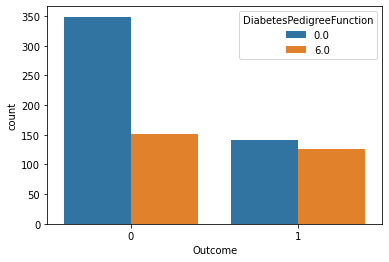

In [329]:
sns.countplot(data=diabetes_data, x='Outcome', hue=f)

In [330]:
diabetes_data.loc[diabetes_data["Age"]<15,"Age"]=0
diabetes_data.loc[(diabetes_data["Age"]>=15)&(diabetes_data["Age"]<20),"Age"]=1
diabetes_data.loc[(diabetes_data["Age"]>=20)&(diabetes_data["Age"]<25),"Age"]=2
diabetes_data.loc[(diabetes_data["Age"]>=25)&(diabetes_data["Age"]<30),"Age"]=3
diabetes_data.loc[(diabetes_data["Age"]>=30)&(diabetes_data["Age"]<35),"Age"]=4
diabetes_data.loc[(diabetes_data["Age"]>=35)&(diabetes_data["Age"]<40),"Age"]=5
diabetes_data.loc[(diabetes_data["Age"]>=40)&(diabetes_data["Age"]<45),"Age"]=4
diabetes_data.loc[(diabetes_data["Age"]>=45)&(diabetes_data["Age"]<50),"Age"]=5
diabetes_data.loc[diabetes_data["Age"]>=50,"Age"]=6

<AxesSubplot:xlabel='Outcome', ylabel='count'>

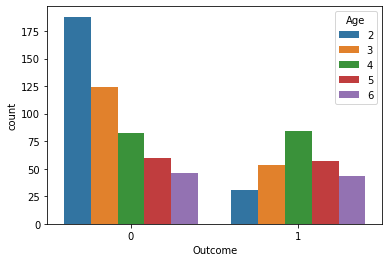

In [331]:
sns.countplot(data=diabetes_data, x='Outcome', hue='Age')

In [332]:
s="SkinThickness"
diabetes_data.loc[diabetes_data[s]<15,s]=0
diabetes_data.loc[(diabetes_data[s]>=15)&(diabetes_data[s]<25),s]=1
diabetes_data.loc[(diabetes_data[s]>=25)&(diabetes_data[s]<35),s]=2
diabetes_data.loc[(diabetes_data[s]>=35)&(diabetes_data[s]<45),s]=3
diabetes_data.loc[(diabetes_data[s]>=45)&(diabetes_data[s]<55),s]=4
diabetes_data.loc[(diabetes_data[s]>=55),s]=5

<AxesSubplot:xlabel='Outcome', ylabel='count'>

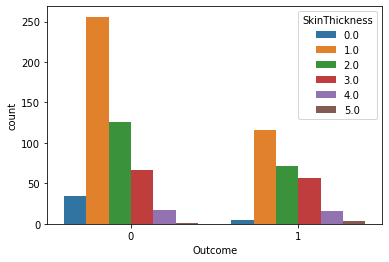

In [333]:
sns.countplot(data=diabetes_data, x='Outcome', hue=s)

In [334]:
i="Insulin"
diabetes_data.loc[diabetes_data[i]<50,i]=0
diabetes_data.loc[(diabetes_data[i]>=50)&(diabetes_data[i]<100),i]=1
diabetes_data.loc[(diabetes_data[i]>=100)&(diabetes_data[i]<200),i]=2
diabetes_data.loc[(diabetes_data[i]>=200)&(diabetes_data[i]<300),i]=3
diabetes_data.loc[(diabetes_data[i]>=300)&(diabetes_data[i]<400),i]=4
diabetes_data.loc[(diabetes_data[i]>=400)&(diabetes_data[i]<500),i]=5
diabetes_data.loc[(diabetes_data[i]>=500),i]=6

<AxesSubplot:xlabel='Outcome', ylabel='count'>

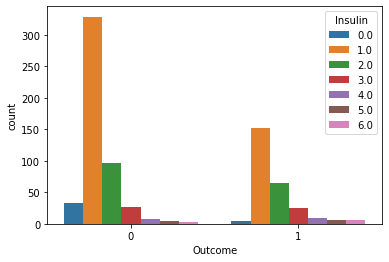

In [335]:
sns.countplot(data=diabetes_data, x='Outcome', hue=i)

In [336]:
BMI="BMI"
diabetes_data.loc[diabetes_data[BMI]<20,BMI]=0
diabetes_data.loc[(diabetes_data[BMI]>=20)&(diabetes_data[BMI]<24),BMI]=1
diabetes_data.loc[(diabetes_data[BMI]>=24)&(diabetes_data[BMI]<28),BMI]=2
diabetes_data.loc[(diabetes_data[BMI]>=28)&(diabetes_data[BMI]<32),BMI]=3
diabetes_data.loc[(diabetes_data[BMI]>=32)&(diabetes_data[BMI]<36),BMI]=4
diabetes_data.loc[(diabetes_data[BMI]>=36)&(diabetes_data[BMI]<40),BMI]=5
diabetes_data.loc[(diabetes_data[BMI]>=40)&(diabetes_data[BMI]<44),BMI]=6
diabetes_data.loc[(diabetes_data[BMI]>=44)&(diabetes_data[BMI]<48),BMI]=7
diabetes_data.loc[(diabetes_data[BMI]>=48)&(diabetes_data[BMI]<52),BMI]=8
diabetes_data.loc[(diabetes_data[BMI]>=52),BMI]=9

<AxesSubplot:xlabel='Outcome', ylabel='count'>

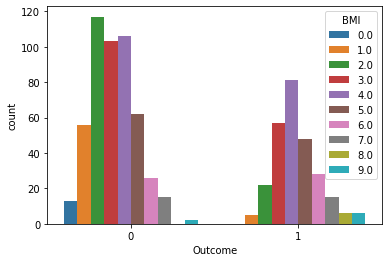

In [337]:
sns.countplot(data=diabetes_data, hue='BMI', x='Outcome')

### 평가

In [338]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

print('모든 데이터', diabetes_data.shape)
print('training set', X_train.shape, y_train.shape)
print('test set',X_test.shape, y_test.shape)


# 로지스틱 회귀로 학습,예측 및 평가 수행.


lr_clf = LogisticRegression().fit(X_train , y_train)
y_pred = lr_clf.predict(X_test)

모든 데이터 (768, 9)
training set (614, 8) (614,)
test set (154, 8) (154,)


In [339]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    
print('오차행렬:')
print(confusion)
print('정확도: {:.4f}\n'.format(accuracy))
print('정밀도: {:.4f}\n'.format(precision))
print('재현율: {:.4f}\n'.format(recall))
print('F1: {:.4f}\n'.format(F1))

오차행렬:


NameError: name 'confusion' is not defined

In [ ]:
get_clf_eval(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr.predict_proba(x_valid)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_valid, pred_proba_class1)
# 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

In [ ]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [ ]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))